In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(AveragePooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(AveragePooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = METRICS)

In [ ]:
train_data_dir = '/content/drive/My Drive/DR_Messidor_Dataset'
img_height = 256
img_width = 256
batch_size = 32

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

In [ ]:
history = classifier.fit(training_set, validation_data = test_set,batch_size=32,epochs=18, verbose=2)

Epoch 1/18
8/8 - 51s - loss: 1.1793 - accuracy: 0.5336 - precision: 0.6294 - recall: 0.5806 - auc: 0.5138 - val_loss: 0.6248 - val_accuracy: 0.5824 - val_precision: 0.5529 - val_recall: 1.0000 - val_auc: 0.8994 - 51s/epoch - 6s/step
Epoch 2/18
8/8 - 6s - loss: 0.5975 - accuracy: 0.6719 - precision: 0.6513 - recall: 1.0000 - auc: 0.7767 - val_loss: 0.5542 - val_accuracy: 0.7692 - val_precision: 0.6970 - val_recall: 0.9787 - val_auc: 0.9021 - 6s/epoch - 692ms/step
Epoch 3/18
8/8 - 6s - loss: 0.5909 - accuracy: 0.7194 - precision: 0.7308 - recall: 0.8581 - auc: 0.7273 - val_loss: 0.5045 - val_accuracy: 0.8022 - val_precision: 0.7377 - val_recall: 0.9574 - val_auc: 0.9338 - 6s/epoch - 698ms/step
Epoch 4/18
8/8 - 6s - loss: 0.5885 - accuracy: 0.7233 - precision: 0.7225 - recall: 0.8903 - auc: 0.7542 - val_loss: 0.4847 - val_accuracy: 0.8462 - val_precision: 0.7895 - val_recall: 0.9574 - val_auc: 0.9420 - 6s/epoch - 703ms/step
Epoch 5/18
8/8 - 6s - loss: 0.5345 - accuracy: 0.7273 - precision

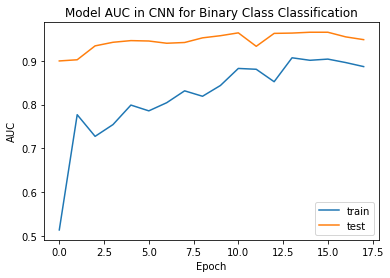

In [ ]:
import matplotlib.pyplot as plt
auc = [0.5138,0.7767,0.7273, 0.7542 ,  0.7987,0.7855,0.8041,0.8312 ,0.8188 ,0.8434, 0.8823, 0.8804,0.8520,0.9066,0.9009,0.9036,0.8957,0.8865]
val_auc = [0.8994,0.9021,0.9338,0.9420,0.9458,0.9449, 0.9398, 0.9415,0.9521, 0.9570,0.9635,0.9328, 0.9623, 0.9630,0.9649, 0.9649, 0.9543, 0.9480 ]
plt.title('Model AUC in CNN for Binary Class Classification')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.plot(auc, label='train')
plt.plot(val_auc, label='test')
plt.legend()
plt.show()


In [ ]:
score = classifier.evaluate(test_set)
f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print("\n","Loss: ", score[0],"\n", "Accuracy: ", score[1],"\n", "Precision: ",score[2], "\n","Recall: ",score[3],"\n","F1-Score: ",f1_score,"\n","AUC: ",score[4])

3/3 [==============================] - 1s 178ms/step - loss: 0.3200 - accuracy: 0.8791 - precision: 0.8600 - recall: 0.9149 - auc: 0.9480

 Loss:  0.3200305998325348 
 Accuracy:  0.8791208863258362 
 Precision:  0.8600000143051147 
 Recall:  0.914893627166748 
 F1-Score:  0.8865979505099656 
 AUC:  0.948017418384552


In [ ]:
print('\nEpoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy')
Epochs = 18
for i in range(Epochs):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['loss'][i], history.history['accuracy'][i], history.history['val_loss'][i], history.history['val_accuracy'][i]))


Epoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy
       1   1.179311 	   0.533597 	   0.624756 	   0.582418
       2   0.597471 	   0.671937 	   0.554187 	   0.769231
       3   0.590890 	   0.719368 	   0.504469 	   0.802198
       4   0.588504 	   0.723320 	   0.484674 	   0.846154
       5   0.534474 	   0.727273 	   0.435003 	   0.835165
       6   0.549281 	   0.723320 	   0.423893 	   0.835165
       7   0.522949 	   0.750988 	   0.416502 	   0.857143
       8   0.489163 	   0.798419 	   0.383955 	   0.824176
       9   0.499378 	   0.766798 	   0.421790 	   0.813187
      10   0.481215 	   0.794466 	   0.371011 	   0.868132
      11   0.427512 	   0.826087 	   0.392897 	   0.835165
      12   0.421122 	   0.826087 	   0.364457 	   0.868132
      13   0.454339 	   0.766798 	   0.434823 	   0.747253
      14   0.387452 	   0.853755 	   0.336851 	   0.857143
      15   0.393124 	   0.822134 	   0.293340 	   0.923077
      16   0.382624 	   0.830040 	   0.35196

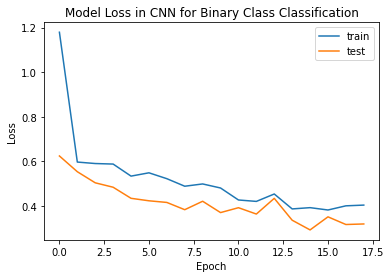

In [ ]:
# plot loss during training
import matplotlib.pyplot as pyplot
pyplot.title('Model Loss in CNN for Binary Class Classification')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/BrainTumorDataset/LossMaxPooling.png')
pyplot.legend()
pyplot.show()

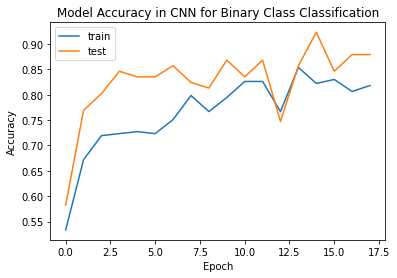

In [ ]:
# plot accuracy during training
pyplot.title('Model Accuracy in CNN for Binary Class Classification')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/BrainTumorDataset/AccuracyMaxPooling.png')
pyplot.legend()
pyplot.show()

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 127, 127, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 average_pooling2d_1 (Averag  (None, 62, 62, 32)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 128)               1

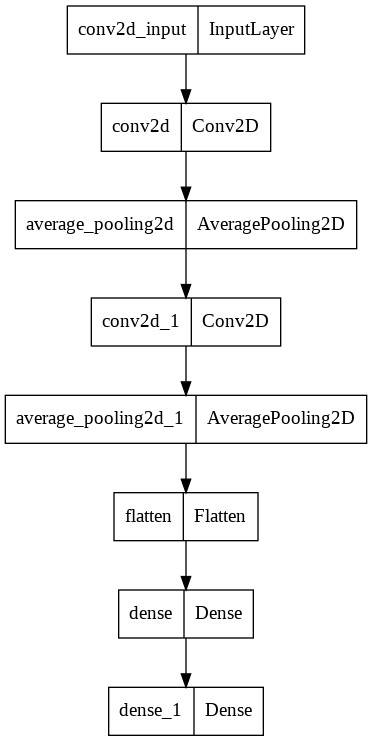

In [ ]:
from keras.utils.vis_utils import plot_model as plot
plot(classifier, to_file='/content/drive/My Drive/BrainTumorDataset/CNNMaxPooling.png')